<a href="https://colab.research.google.com/github/harshitharavi26/Sketch-Recognition/blob/main/Inception_Sketch(GAP1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tqdm import tqdm
%matplotlib inline
import cv2
import glob
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
dir = '/content/drive/My Drive/png'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    print(target_labels)
    return files,targets,target_labels

X,y,target_labels = load_dataset(dir)

['airplane' 'alarm clock' 'angel' 'ant' 'apple' 'arm' 'armchair' 'ashtray'
 'axe' 'backpack' 'banana' 'barn' 'baseball bat' 'basket' 'bathtub'
 'bear (animal)' 'bed' 'bee' 'beer-mug' 'bell' 'bench' 'bicycle'
 'binoculars' 'blimp' 'book' 'bookshelf' 'boomerang' 'bottle opener'
 'bowl' 'brain' 'bread' 'bridge' 'bulldozer' 'bus' 'bush' 'butterfly'
 'cabinet' 'cactus' 'cake' 'calculator' 'camel' 'camera' 'candle' 'cannon'
 'canoe' 'car (sedan)' 'carrot' 'castle' 'cat' 'cell phone' 'chair'
 'chandelier' 'church' 'cigarette' 'cloud' 'comb' 'computer monitor'
 'computer-mouse' 'couch' 'cow' 'crab' 'crane (machine)' 'crocodile'
 'crown' 'cup' 'diamond' 'dog' 'dolphin' 'donut' 'door' 'door handle'
 'dragon' 'duck' 'ear' 'elephant' 'envelope' 'eye' 'eyeglasses' 'face'
 'fan']


In [ ]:
classes = len(np.unique(y))
y= np_utils.to_categorical(y,classes)
y[0] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
X_train,x_val,Y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
print(len(X_train))
print(len(x_val))
print(len(x_test))

4096
1280
1024


In [ ]:
default_image_size=tuple((150,150))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Size of Training set: ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Size of Validation set: ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Size of Test set: ',x_test.shape)

Size of Training set:  (4096, 150, 150, 3)
Size of Validation set:  (1280, 150, 150, 3)
Size of Test set:  (1024, 150, 150, 3)


In [ ]:
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [ ]:
batch_size = 64
epochs = 60
num_classes = y.shape[1]

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Model, layers
#pre_trained_model = InceptionV3(input_shape = (150, 150, 3),include_top=False, weights="imagenet")
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),pooling='avg',include_top=False, weights="imagenet")
#for layer in pre_trained_model.layers:
 # layer.trainable = False
#pre_trained_model.summary()

#last_layer = pre_trained_model.get_layer('mixed7')
#print('last layer output shape: ', last_layer.output_shape)
#last_output = last_layer.output

from keras import Model
layer_name = 'mixed7'
my_model = Model(inputs=pre_trained_model.input,outputs=pre_trained_model.get_layer(layer_name).output)
my_model.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [ ]:
# Flatten the output layer to 1 dimension
#x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.3
#x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
#x = layers.Dense  (250, activation='softmax')(x)  
from keras import models         
model = models.Sequential()
model.add(my_model)
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(80,activation='softmax'))
model.layers[7].trainable = False

#model = Model( pre_trained_model.input, x) 
#model.summary()

In [ ]:

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
#batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
model_dropout = model.fit_generator(imagegen.flow(X_train,Y_train, batch_size=32),epochs=60,callbacks=[checkpoint,reduce_lr],verbose=2,
                          validation_data=imagegen.flow(x_val, y_val,batch_size=32),shuffle=True,steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/60

Epoch 00001: val_accuracy improved from -inf to 0.58203, saving model to cnn3.hdf5
64/64 - 17s - loss: 0.7480 - accuracy: 0.7798 - val_loss: 1.6940 - val_accuracy: 0.5820
Epoch 2/60

Epoch 00002: val_accuracy improved from 0.58203 to 0.60469, saving model to cnn3.hdf5
64/64 - 17s - loss: 0.6499 - accuracy: 0.8018 - val_loss: 1.6644 - val_accuracy: 0.6047
Epoch 3/60

Epoch 00003: val_accuracy did not improve from 0.60469
64/64 - 16s - loss: 0.7204 - accuracy: 0.7905 - val_loss: 1.7007 - val_accuracy: 0.5781
Epoch 4/60

Epoch 00004: val_accuracy did not improve from 0.60469
64/64 - 16s - loss: 0.6525 - accuracy: 0.8037 - val_loss: 1.7249 - val_accuracy: 0.5969
Epoch 5/60

Epoch 00005: val_accuracy did not improve from 0.60469
64/64 - 16s - loss: 0.6900 - accuracy: 0.7993 - val_loss: 1.7659 - val_accuracy: 0.6008
Epoch 6/60

Epoch 00006: val_accuracy did not improve from 0.60469
64/64 - 16s - loss: 0.6610 - accuracy: 0.8135 - val_loss: 1.6979 - val_accuracy: 0.5742
Epoch 7/60


In [ ]:
model.load_weights('cnn3.hdf5')

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=32,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#accuracy !!


 Test Loss Test accuracy: 1.691748023033142 0.638671875


In [ ]:
#y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
#y_true = np.argmax(y_test,axis = 1).astype(int)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)

y_true = np.argmax(y_test,axis = 1).astype(int)
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d Images are identified correctly" %(corr_count))
print("%d Images are identified incorrectly" %(incorr_count))

654 Images are identified correctly
370 Images are identified incorrectly


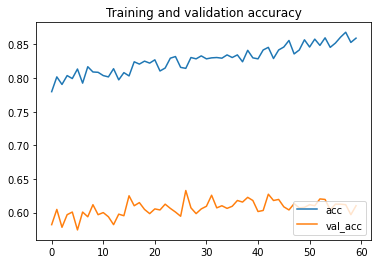

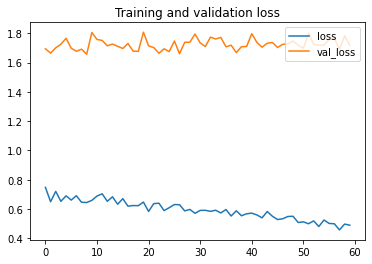

In [ ]:
import matplotlib.pyplot as plt
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()

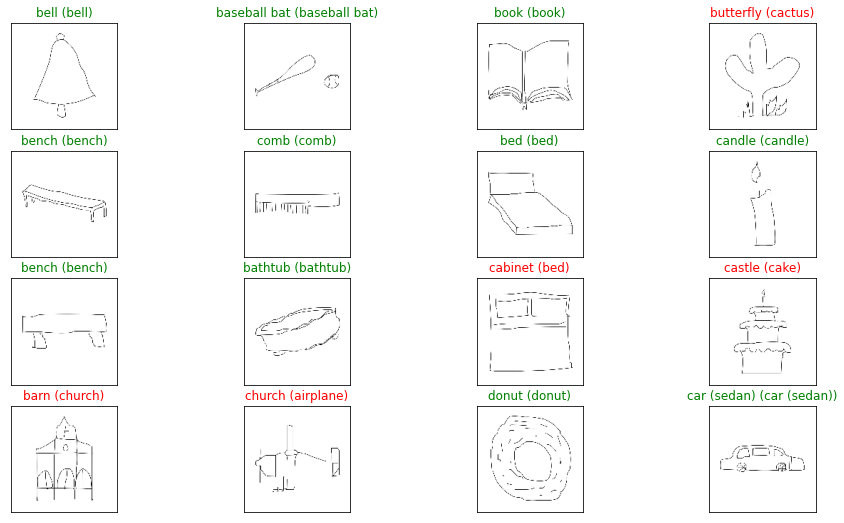

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

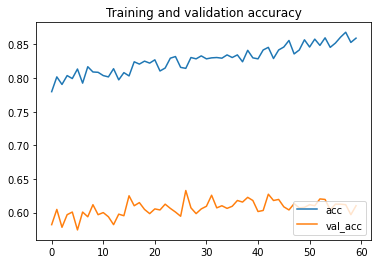

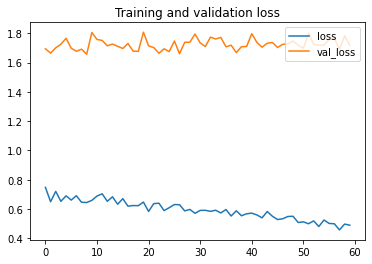

In [ ]:
import matplotlib.pyplot as plt
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()

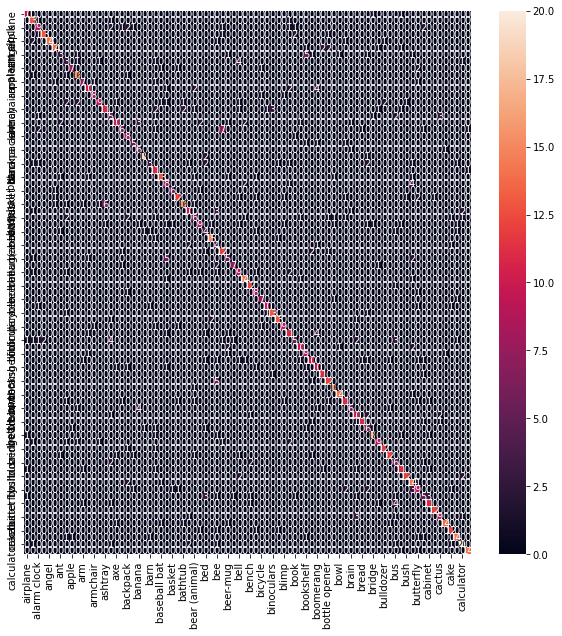

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)

conf_mat=confusion_matrix(y_true,y_pred_classes)

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()

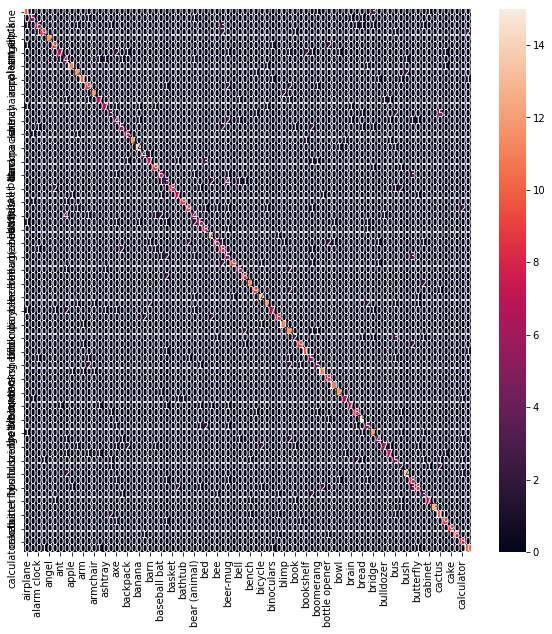

In [ ]:
#confusion matrix
y_pred2=model.predict(x_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()